In [205]:
import pandas as pd

In [206]:
df=pd.read_csv('dataset.csv')

In [207]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres',
       'Last Updated'],
      dtype='object')

In [208]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [209]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [210]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Blitzer.de,MAPS_AND_NAVIGATION,4.5,65590,18M,5000000,Free,0.0,Everyone,Maps & Navigation,"July 9, 2018"
1,NBA LIVE Mobile Basketball,SPORTS,4.4,1690802,58M,50000000,Free,0.0,Everyone,Sports,"May 21, 2018"
2,Image 2 Wallpaper,TOOLS,4.3,81668,Varies with device,5000000,Free,0.0,Everyone,Tools,"December 26, 2016"
3,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,500000000,Free,0.0,Everyone,Communication,"July 18, 2018"
4,Block Puzzle Classic Legend !,GAME,4.2,17039,4.9M,5000000,Free,0.0,Everyone,Puzzle,"April 13, 2018"


In [211]:
df.shape

(700, 11)

In [212]:
df[df.duplicated()].shape

(93, 11)

In [213]:
df=df.drop_duplicates(subset='App')

In [214]:
df.shape

(564, 11)

In [215]:
df[df.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


In [216]:
df['Rating']=df['Rating'].fillna(value=round(df['Rating'].mean(),1))

In [217]:
df['Type']=df['Type'].fillna(method='ffill')

In [218]:
df[df.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated


In [219]:
#Data Interpolation
count=0
for rating in df['Rating']:
    if(rating<1.0 or rating>5.0):
        count+=1
print(count)

0


In [220]:
from sklearn import preprocessing

In [221]:
cat_col=['App','Category','Size','Type','Content Rating','Genres', 'Last Updated']

In [222]:
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])

In [223]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,61,17,4.5,65590,13,5000000,0,0.0,0,35,99
1,349,26,4.4,1690802,71,50000000,0,0.0,0,53,146
2,270,27,4.3,81668,134,5000000,0,0.0,0,55,36
3,506,5,4.3,11334799,134,500000000,0,0.0,0,17,75
4,64,12,4.2,17039,48,5000000,0,0.0,0,43,4


In [224]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [225]:
df['Type'].unique()

array([0, 1], dtype=int64)

In [226]:
df['Price'].unique()

array([0.  , 6.99])

In [227]:
col=df.columns[:6:].append(df.columns[8::])

In [228]:
df=(df-df.mean())/df.std() #Standardization of data

In [229]:
df.mean()

App              -1.200773e-17
Category          1.393684e-16
Rating           -8.373719e-15
Reviews           1.604312e-17
Size             -2.086589e-17
Installs         -3.001933e-16
Type             -9.023023e-17
Price            -1.190193e-16
Content Rating    2.007850e-17
Genres            1.330693e-16
Last Updated      1.763759e-16
dtype: float64

In [230]:
df.std()

App               1.0
Category          1.0
Rating            1.0
Reviews           1.0
Size              1.0
Installs          1.0
Type              1.0
Price             1.0
Content Rating    1.0
Genres            1.0
Last Updated      1.0
dtype: float64

In [231]:
df=(df-df.min())/(df.max()-df.min()) #Normalization of data

In [232]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,0.108348,0.566667,0.777778,0.000951,0.097015,0.000000,0.0,0.0,0.0,0.573770,0.543956
1,0.619893,0.866667,0.722222,0.025362,0.529851,0.045226,0.0,0.0,0.0,0.868852,0.802198
2,0.479574,0.900000,0.666667,0.001192,1.000000,0.000000,0.0,0.0,0.0,0.901639,0.197802
3,0.898757,0.166667,0.666667,0.170222,1.000000,0.497487,0.0,0.0,0.0,0.278689,0.412088
4,0.113677,0.400000,0.611111,0.000221,0.358209,0.000000,0.0,0.0,0.0,0.704918,0.021978


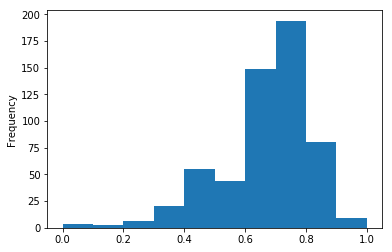

In [235]:
df['Rating'].plot.hist()

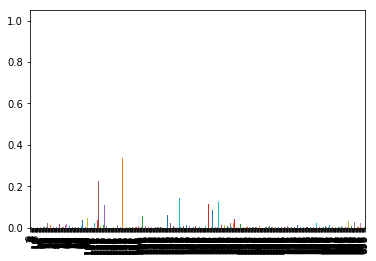

In [234]:
df['Reviews'].plot.bar()

In [238]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

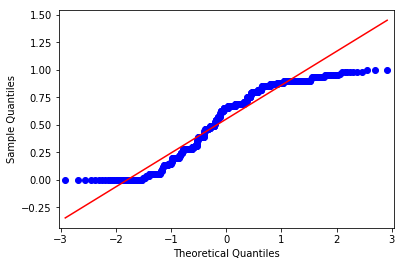

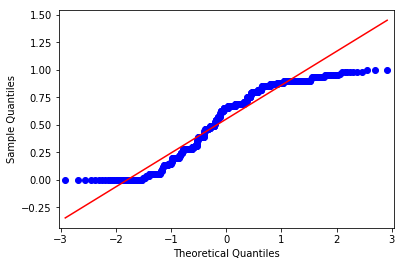

In [239]:
qqplot(df['Genres'],line='s')